In [1]:
#install library
#!pip install scikit-learn 
#!pip install matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
#print("Matplotlib installed successfully!")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'car data.csv',
 'Linear Regression.ipynb',
 'Linear_two.ipynb',
 'marital status.csv',
 'nasdaq100.csv',
 'Salary Data.csv']

In [4]:
df=pd.read_csv('nasdaq100.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [5]:
#null value check
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [6]:
#Date column delete
## column delete axis=1 , row delete axis=0

df.drop('Date',axis=1)

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Stock Prices')

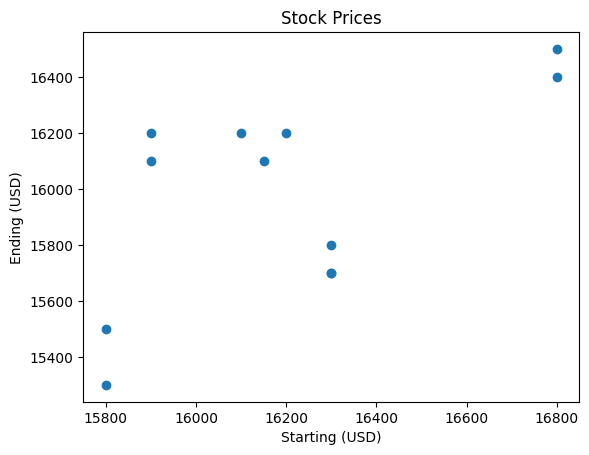

In [7]:

##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')



In [8]:
x=df[['Starting (USD)']]
x

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300
5,16800
6,15900
7,15800
8,16150
9,16300


In [9]:
y=df[['Ending (USD)']]
y

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700
5,16400
6,16200
7,15500
8,16100
9,15800


### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression()

Text(0.5, 1.0, 'Stock Prices')

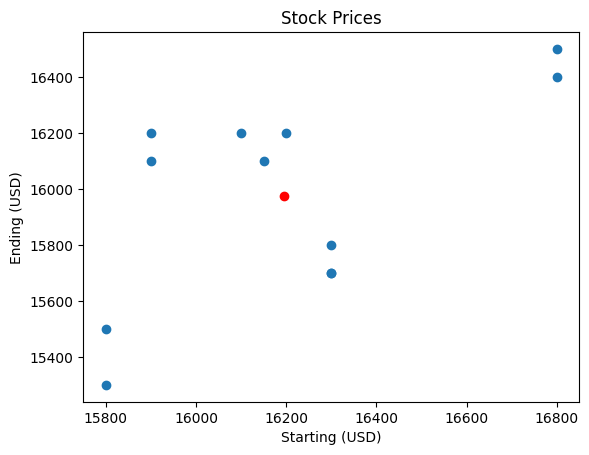

In [17]:
#mean finding and graph..... best fit line go through using mean line
#x.mean(),y.mean()

plt.scatter(x.mean(),y.mean(),color='red')
##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')


In [18]:
reg.fit(x, y)  #train the model

LinearRegression()